# 第六次计算机编程作业：聚类、支撑向量机与核方法

## 1. K-Means聚类

### 读取数据集

In [ ]:
import numpy as np

DATASET_DIR = 'data/k-means_samples.csv'
DATASET = np.loadtxt(DATASET_DIR, delimiter=',')
X = DATASET[:, :-1]
Y = DATASET[:, -1]
centers = np.array([[1, -1],
                    [5.5, -4.5],
                    [1, 4],
                    [6, 4.5],
                    [9, 0.0]])
print("Dataset loaded. {} samples in total.".format(X.shape[0]))

定义初始化方式：均值从产生数据的高斯分布中采样

In [ ]:
def gaussian_initial(sigma=15):
    cov = [[1 * sigma, 0], [0, 1 * sigma]]
    c1 = np.random.multivariate_normal([1, -1], cov, 1)
    c2 = np.random.multivariate_normal([5.5, -4.5], cov, 1)
    c3 = np.random.multivariate_normal([1, 4], cov, 1)
    c4 = np.random.multivariate_normal([6, 4.5], cov, 1)
    c5 = np.random.multivariate_normal([9, 0.0], cov, 1)
    return np.array([c1, c2, c3, c4, c5]).reshape(-1, 2)


### 聚类

In [ ]:
import kmeans

Kmeans = kmeans.KMeans(n_clusters=5, max_iter=20, verbose=False)
means, assign = Kmeans.fit_predict(X, gaussian_initial)

acc, avg_dist, center_error= Kmeans.score(Y, centers)  # 效果评估
print("clustering accuracy: {:.3f},\t average distance: {:.3f} \n center_error: {}".format(acc, avg_dist, center_error))

### 绘图

In [ ]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

def draw(_means, _X, _assign):
    plt.cla()
    n_clusters = int(np.max(_assign)) + 1
    for _i in range(n_clusters):
        cluster_idx = np.where(_assign == _i)[0]
        plt.plot(_X[cluster_idx, 0], _X[cluster_idx, 1], '.', label='cluster {}'.format(_i+1))
    plt.plot(_means[:, 0], _means[:, 1], 'r^', label='cluster centers')

draw(means, X, assign)
plt.plot(centers[:, 0], centers[:, 1], 'rx', label="ground truth")
plt.legend()
# plt.savefig('../fig/kmeans.pdf', bbox_inches='tight', pad_inches=0.0)
# plt.show()

## 2. Ng谱聚类

### 读取数据集

In [1]:
import numpy as np

DATASET_DIR = 'data/spectral_clustering_samples.csv'
DATASET = np.loadtxt(DATASET_DIR, delimiter=' ')
X = DATASET[:, :-1]
Y = DATASET[:, -1]

print("Dataset loaded. {} samples in total.".format(X.shape[0]))

Dataset loaded. 200 samples in total.


### 谱嵌入（Spectral Embedding）

In [100]:
import SpectralClustering as sc

sigma = 1
k_neighbors = 10

def gaussian_kernel(dist, sigma=1):
    _x = dist**2/(sigma**2)/2
    return np.exp(-_x)

spectral_cluster = sc.SpectralClusteringNG(n_components=2, n_neighbors=k_neighbors)
X_spectral_embedded = spectral_cluster.fit_tranform(X, gaussian_kernel)

### K-Means 聚类

In [101]:
import kmeans
Kmeans = kmeans.KMeans(n_clusters=2, max_iter=1500, verbose=False)
means, assign = Kmeans.fit_predict(X_spectral_embedded)

# acc, avg_dist, center_error= Kmeans.score(Y, centers)
# print("clustering accuracy: {:.3f},\t average distance: {:.3f} \n center_error: {}".format(acc, avg_dist, center_error))

[Output] mean vectors:
[[ 0.71951389 -0.6389582 ]
 [ 0.76084015  0.5695799 ]]



### 绘图

accuracy: 0.7250


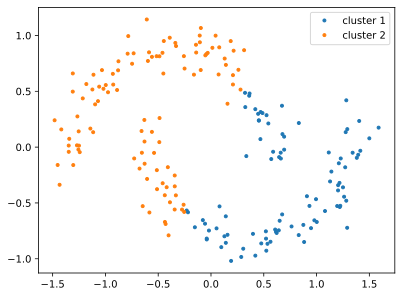

In [102]:
import matplotlib.pyplot as plt
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

def draw(_X, _assign):
    plt.cla()
    n_clusters = int(np.max(_assign)) + 1
    for _i in range(n_clusters):
        cluster_idx = np.where(_assign == _i)[0]
        plt.plot(_X[cluster_idx, 0], _X[cluster_idx, 1], '.', label='cluster {}'.format(_i+1))

correct = np.sum(Y == assign)
print("accuracy: {:.4f}".format(max(correct / float(Y.shape[0]), 1-correct / float(Y.shape[0]))))
draw(X, assign)
plt.legend()

In [ ]:
0